# Libplot

This is a collection of plot tools that can be used for data science and machine learning projects. We use `matplotlib` to plot figures.

## Definition

We first define the class and its methods:

In [1]:
import numpy             as np
import matplotlib        as mpl
import matplotlib.pyplot as plt

class Plot:
    '''
    This is a class to plot various kinds of data in their proper format using a unified interface.
    
    
    Public methods:
    
        General:
            save:           save the current figure to file (default format: pdf),
            close:          close the current figure,
            save_and_close: save the current figure to file and close it (default format: pdf).
            
        Plots:
            series2D:       plot a (time or labelled) series of data,
            scatter2D:      scatter plot of XY data,
            matrix:         plot entries of a matrix,
            hist2D:         plot a 2D histogram.
    '''
    
    def __init__(self,
                 rows=1,
                 columns=1,
                 width=6,
                 height=5
                ):
        '''
        Constructor of the class.
        
        Required argument:
            rows:    the number of rows in the figure,
            columns: the number of columns in the figure,
            width:   the width of one plot,
            height:  the height of one plot.
        '''
        
        # initialization
        self.figure, self.axes = plt.subplots(rows,
                                              columns,
                                              figsize=(width * columns,
                                                       height * rows)
                                             )
        
    ######################################
    #                                    #
    # GENERAL                            #
    #                                    #
    ######################################
    
    def save(self,
             filename,
             tight_layout=True,
             extension='pdf',
             resolution=96
            ):
        '''
        Save the current figure to file.
        
        Required arguments:
            filename:     the name of the file withouth the extension.
            
        Optional arguments:
            tight_layout: whether to use the tight layout in the saved figure,
            extension:    the format of the saved file (extension will be added to the file name),
            resolution:   dpi resolution of the saved figure.
        '''
        
        if tight_layout:
            self.figure.tight_layout() #-------------------------- add tight layout to the figure
            
        self.figure.savefig(fname=filename + '.' + extension, #--- filename
                            dpi=resolution,                   #--- dpi resolution
                            format=extension,                 #--- extension of the file
                           )
        
        return self
        
    def close(self):
        '''
        Close the current figure.
        '''
        
        plt.show()
        plt.close(self.figure) #--- close the current figure
        
    def save_and_close(self,
                       filename,
                       tight_layout=True,
                       extension='pdf',
                       resolution=96
                      ):
        '''
        Save the current figure to file and close it.
        
        Required arguments:
            filename:     the name of the file withouth the extension.
            
        Optional arguments:
            tight_layout: whether to use the tight layout in the saved figure,
            extension:    the format of the saved file (extension will be added to the file name),
            resolution:   dpi resolution of the saved figure.
        '''
        
        self.save(filename=filename,
                  tight_layout=tight_layout,
                  extension=extension,
                  resolution=resolution
                 ) #--------------------------- save the current figure
        self.close() #------------------------- close the current figure
        
    ######################################
    #                                    #
    # PLOTS                              #
    #                                    #
    ######################################
    
    def series2D(self,
                 data,
                 axis=0,
                 step=False,
                 title=None,
                 xlabel=None,
                 ylabel=None,
                 legend=None,
                 labels=None,
                 xlog=False,
                 ylog=False,
                 binstep=1,
                 **kwargs):
        '''
        Plot a series of data with ordered x axis (e.g.: time series).

        Required arguments:
            data:     a 1D iterable object with the data to plot.

        Optional arguments:
            axis:     the id of the axis to use for the plot,
            step:     whether to use a step function for the plot,
            title:    the title of the plot,
            xlabel:   the label of the x axis,
            ylabel:   the label of the y axis,
            legend:   the label for the legend in the plot,
            labels:   the name of ticks on the x axis,
            xlog:     whether to use the log scale on the x axis,
            ylog:     whether to use the log scale on the y axis,
            binstep:  the space between ticks on the x axis,
            **kwargs: additional arguments to pass to plt.step or plt.plot.
        '''

        # choose the axis
        if isinstance(self.axes, np.ndarray): #----- if multiple axes are present
            ax = self.axes[axis]
        else: #------------------------------------- if only one axis
            ax = self.axes

        # preparation
        ax.grid(alpha=0.2) #------------------------ create the grid
        ax.set_title(title) #----------------------- set the title
        ax.set_xlabel(xlabel) #--------------------- set label for the x axis
        ax.set_ylabel(ylabel) #--------------------- set label for the y axis
        if xlog:
            ax.set_xscale('log') #------------------ use log scale on the x axis (if requested)
        if ylog:
            ax.set_yscale('log') #------------------ use log scale on the y axis (if requested)

        # create time series
        series = np.arange(1,
                           np.shape(data)[0]+1,
                           step=1
                          ) #----------------------- create x axis
        if binstep > 0:
            xticks = np.arange(1,
                               np.shape(data)[0]+1,
                               step=binstep
                              ) #------------------- create x ticks
            ax.set_xticks(xticks) #----------------- set x ticks
            if labels is not None:
                ax.set_xticklabels(labels,
                                   rotation=45,
                                   ha='right'
                                  ) #--------------- set labels on the x axis

        # plot the data
        if step:
            ax.step(series,
                    data,
                    label=legend,
                    **kwargs) #--------------------- plot a step function
        else:
            ax.plot(series,
                    data,
                    label=legend,
                    **kwargs) #--------------------- plot a continous function
        if legend is not None:
            ax.legend(loc='best') #----------------- show the legend
            
        return self
            
    def scatter2D(self,
                  data,
                  axis=0,
                  title=None,
                  xlabel=None,
                  ylabel=None,
                  legend=None,
                  xlog=False,
                  ylog=False,
                  colour=True,
                  colour_label=None,
                  size=True,
                  size_labels=0,
                  **kwargs):
        '''
        Scatter plot of occurrencies with colour and size codes.

        Required arguments:
            data:         a 3D iterable object with the data to plot:
                                data[0]: x axis values,
                                data[1]: y axis values,
                                data[2]: size/colour labels.

        Optional arguments:
            axis:         the id of the axis to use for the plot,
            title:        the title of the plot,
            xlabel:       the label of the x axis,
            ylabel:       the label of the y axis,
            legend:       the label for the legend in the plot,
            xlog:         whether to use the log scale on the x axis,
            ylog:         whether to use the log scale on the y axis,
            colour:       whether to use colour labels,
            colour_label: the label to use for the colour bar axis,
            size:         whether to use entries of different size,
            size_legend:  the length of the legend of the sizes,
            **kwargs:     additional arguments to pass to plt.scatter.
        '''

        # choose the axis
        if isinstance(self.axes, np.ndarray): #------------------------ if multiple axes are present
            ax = self.axes[axis]
        else: #-------------------------------------------------------- if only one axis
            ax = self.axes

        # preparation
        ax.grid(alpha=0.2) #------------------------------------------- create the grid
        ax.set_title(title) #------------------------------------------ set the title
        ax.set_xlabel(xlabel) #---------------------------------------- set label for the x axis
        ax.set_ylabel(ylabel) #---------------------------------------- set label for the y axis
        if xlog:
            ax.set_xscale('log') #------------------------------------- use log scale on the x axis (if requested)
        if ylog:
            ax.set_yscale('log') #------------------------------------- use log scale on the y axis (if requested)

        # plot the data
        if colour:
            if size: #------------------------------------------------- plot with colours and size legend
                scat = ax.scatter(data[0],
                                  data[1],
                                  s=data[2],
                                  c=data[2],
                                  **kwargs
                                 )
            else: #---------------------------------------------------- plot with colours but no size legend
                scat = ax.scatter(data[0],
                                  data[1],
                                  c=data[2],
                                  **kwargs
                                 )
            cbar = ax.figure.colorbar(scat,
                                      ax=ax
                                     ) #------------------------------- create colour bar
            cbar.ax.set_ylabel(colour_label,
                               rotation=-90,
                               va='bottom'
                              ) #-------------------------------------- set the label of the colour bar
        else:
            if size: #------------------------------------------------- plot with size legend but no colours
                scat = ax.scatter(data[0],
                                  data[1],
                                  s=data[2],
                                  **kwargs
                                 )
            else: #---------------------------------------------------- plot without size legend and colours
                scat = ax.scatter(data[0],
                                  data[1],
                                  **kwargs
                                 )
        # set labels and legend
        scat.set_label(legend) #--------------------------------------- set label of the plot
        if size_labels:#----------------------------------------------- add the size legend (if requested)
            handles, labels = scat.legend_elements('sizes',
                                                   num=size_labels) #-- get handles names and labels
            ax.legend(handles,
                      labels,
                      loc='lower center',
                      bbox_to_anchor=(0.5,-0.3),
                      ncol=len(handles),
                      fontsize='medium',
                      frameon=False) #--------------------------------- plot the size legend

        if legend: #--------------------------------------------------- show the legend
            ax.legend(loc='best')
            
        return self
    
    def matrix(self,
               data,
               axis=0,
               title=None,
               xticks=None,
               yticks=None,
               label=None,
               **kwargs):
        '''
        Plot matrix entries.

        Required arguments:
            data:     the matrix to plot.

        Optional arguments:
            axis:     the id of the axis to use for the plot,
            xticks:   the name of the entries in the columns of the matrix,
            yticks:   the name of the entries in the rows of the matrix,
            label:    the label to use for the colour bar axis,
            **kwargs: additional arguments to pass to plt.matshow
        '''

        # choose the axis
        if isinstance(self.axes, np.ndarray): #--------------- if multiple axes are present
            ax = self.axes[axis]
        else: #----------------------------------------------- if only one axis
            ax = self.axes

        # preparation
        ax.grid(alpha=0.2) #---------------------------------- create the grid
        ax.set_title(title) #--------------------------------- set the title
        ax.set_xticks(range(np.shape(data)[1])) #------------- set ticks of the x axis
        ax.set_yticks(range(np.shape(data)[0])) #------------- set ticks of the x axis
        if xticks is not None:
            ax.set_xticklabels(xticks,
                               ha='right',
                               va='top',
                               rotation=45) #----------------- set the name of the ticks on the x axis
        if yticks is not None:
            ax.set_yticklabels(yticks) #---------------------- set the name of the ticks on the y axis

        # plot the matrix
        matshow = ax.imshow(data,
                            vmin=-1.0,
                            vmax=1.0,
                            **kwargs
                           ) #-------------------------------- show the matrix
        cbar = ax.figure.colorbar(matshow,
                                  ax=ax,
                                  fraction=0.05,
                                  pad=0.05
                                 ) #-------------------------- draw the colour bar
        cbar.ax.set_ylabel(label,
                           va='bottom',
                           rotation=-90) #-------------------- set the label of the colour bar axis

        return self
    
    def hist2D(self,
               data,
               axis=0,
               title=None,
               xlabel=None,
               ylabel=None,
               legend=None,
               xlog=False,
               ylog=False,
               binstep=1,
               **kwargs):
        '''
        Plot histogram of occurrencies (e.g.: frequency plot).

        Required arguments:
            data:     the data to plot

        Optional arguments:
            axis:     the id of the axis to use for the plot,
            title:    the title of the plot
            xlabel:   the label of the x axis
            ylabel:   the label of the y axis
            legend:   the label for the legend in the plot
            xlog:     whether to use the log scale on the x axis
            ylog:     whether to use the log scale on the y axis
            binstep:  the distance between adjacent bins
            **kwargs: additional arguments to pass to plt.hist
        '''

        # choose the axis
        if isinstance(self.axes, np.ndarray): #------- if multiple axes are present
            ax = self.axes[axis]
        else: #--------------------------------------- if only one axis
            ax = self.axes

        # preparation
        ax.grid(alpha=0.2) #-------------------------- create the grid
        ax.set_title(title) #------------------------- set the title
        ax.set_xlabel(xlabel) #----------------------- set label for the x axis
        ax.set_ylabel(ylabel) #----------------------- set label for the y axis
        if xlog:
            ax.set_xscale('log') #-------------------- use log scale on the x axis (if requested)
        if ylog:
            ax.set_yscale('log') #-------------------- use log scale on the y axis (if requested)
        ax.set_xticks(np.arange(np.min(data),
                                np.max(data)+1,
                                step=binstep
                               )
                     ) #------------------------------ set ticks on the x axis
        
        # plot the histogram
        ax.hist(data,
                histtype='step',
                label=legend,
                **kwargs) #--------------------------- plot histogram
        if legend is not None:
            ax.legend(loc='best') #------------------- plot legend

        return self
    
    def fplot2D(self,
                data,
                function,
                fmt,
                title=None,
                xlabel=None,
                ylabel=None,
                legend=None,
                xlog=False,
                ylog=False,
                binstep=1,
                **kwargs
               ):
        '''
        Plot a 1D function given the data in ascissa.
        
        Required arguments:
            data:     the independent variable,
            function: the function to plot,
            fmt:      the style of the line (see Matplotlib documentation).
            
        Optional arguments:
            axis:     the id of the axis to use for the plot,
            title:    the title of the plot
            xlabel:   the label of the x axis
            ylabel:   the label of the y axis
            legend:   the label for the legend in the plot
            xlog:     whether to use the log scale on the x axis
            ylog:     whether to use the log scale on the y axis
            binstep:  the distance between adjacent bins
            **kwargs: additional arguments to pass to plt.plt
        '''
        
        # choose the axis
        if isinstance(self.axes, np.ndarray): #------- if multiple axes are present
            ax = self.axes[axis]
        else: #--------------------------------------- if only one axis
            ax = self.axes

        # preparation
        ax.grid(alpha=0.2) #-------------------------- create the grid
        ax.set_title(title) #------------------------- set the title
        ax.set_xlabel(xlabel) #----------------------- set label for the x axis
        ax.set_ylabel(ylabel) #----------------------- set label for the y axis
        if xlog:
            ax.set_xscale('log') #-------------------- use log scale on the x axis (if requested)
        if ylog:
            ax.set_yscale('log') #-------------------- use log scale on the y axis (if requested)
        ax.set_xticks(np.arange(np.min(data),
                                np.max(data)+1,
                                step=binstep
                               )
                     ) #------------------------------ set ticks on the x axis
        
        # compute the data to plot
        y = [function(x) for x in data] #------------- compute the values of the function
        
        # plot the histogram
        ax.plot(data,
                y,
                fmt,
                label=legend,
                **kwargs) #--------------------------- plot function
        if legend is not None:
            ax.legend(loc='best') #------------------- plot legend

        return self

## Usage

We show some possible examples using the library:

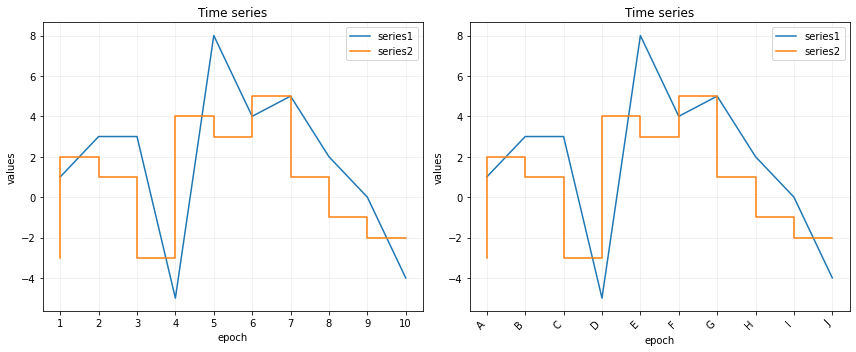

In [2]:
# single time series plot
y1     = [1, 3, 3, -5, 8, 4, 5, 2, 0, -4]
y2     = [-3, 2, 1, -3, 4, 3, 5, 1, -1, -2]
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

plot = Plot(rows=1, columns=2)
plot.series2D(data=y1, axis=0, step=False, title='Time series', xlabel='epoch', ylabel='values', legend='series1')
plot.series2D(data=y2, axis=0, step=True,  title='Time series', xlabel='epoch', ylabel='values', legend='series2')
plot.series2D(data=y1, axis=1, step=False, title='Time series', xlabel='epoch', ylabel='values', legend='series1', labels=labels)
plot.series2D(data=y2, axis=1, step=True,  title='Time series', xlabel='epoch', ylabel='values', legend='series2', labels=labels)
plot.save_and_close('time_series')

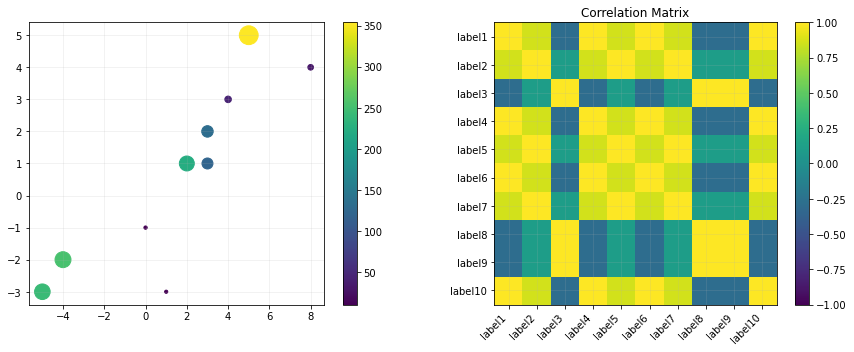

In [3]:
import pandas as pd

# scatter and matrix plot
c = [10, 132, 121, 243, 32, 43, 354, 223, 11, 254]
M = pd.DataFrame(dict(label1=y1, label2=y2, label3=c, label4=y1, label5=y2, label6=y1, label7=y2, label8=c, label9=c, label10=y1)).corr()

plot = Plot(rows=1, columns=2)
plot.scatter2D(data=[y1, y2, c], axis=0)
plot.matrix(data=M, axis=1, title='Correlation Matrix', xticks=M.columns, yticks=M.columns)
plot.save_and_close('scatter_and_matrix')

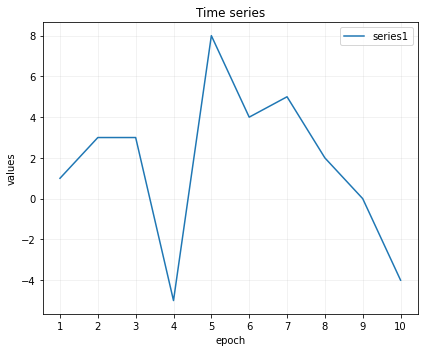

In [4]:
# single plot, inline interface
Plot().series2D(data=y1, step=False, title='Time series', xlabel='epoch', ylabel='values', legend='series1').save_and_close('single_series')

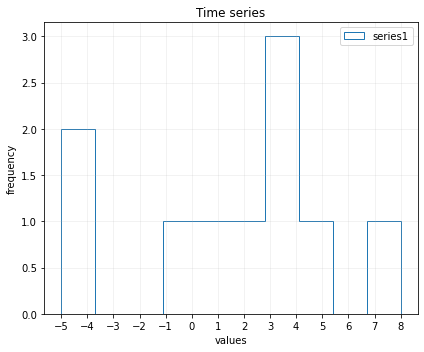

In [5]:
# single histogram
Plot().hist2D(data=y1, title='Time series', xlabel='values', ylabel='frequency', legend='series1').save_and_close('single_histogram')

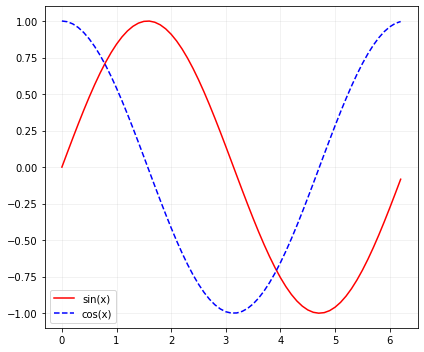

In [6]:
# plot a function
Plot().fplot2D(data=np.arange(0, 2*np.pi, 0.1),
               function=lambda x: np.sin(x),
               fmt='r-',
               legend='sin(x)'
              ).fplot2D(data=np.arange(0, 2*np.pi, 0.1),
                        function=lambda x: np.cos(x),
                        fmt='b--',
                        legend='cos(x)'
                       ).save_and_close('function_plot')